<a href="https://colab.research.google.com/github/NeZorinEgor/Bookstore-DB/blob/main/Texture_generation_via_FFT/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D1%83%D1%80%D1%8B_%D1%87%D0%B5%D1%80%D0%B5%D0%B7_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def generate_texture(image, N, M, amplification_factor, phase_factor):
    result = np.zeros((image.shape[0]*N, image.shape[1]*M, image.shape[2]))

    for color_channel in range(3):
        fft_image_channel = np.fft.fft2(image[:, :, color_channel])
        resized_fft_spectrum = np.zeros((fft_image_channel.shape[0]*N, fft_image_channel.shape[1]*M)).astype(complex)
        resized_fft_spectrum[::N, ::M] = fft_image_channel
        max_amplitude = np.abs(resized_fft_spectrum).max()
        random_amplitude = 1 + (np.random.rand(resized_fft_spectrum.shape[0], resized_fft_spectrum.shape[1])-0.5) * amplification_factor
        amplified_fft_spectrum = resized_fft_spectrum * random_amplitude
        random_phases = np.random.uniform(0.9, 1, resized_fft_spectrum.shape) + 1.j * np.random.uniform(-1.5, 1.5, resized_fft_spectrum.shape) * phase_factor
        random_phases /= np.abs(random_phases)
        resized_fft_spectrum_with_phase = amplified_fft_spectrum * random_phases
        result[:, :, color_channel] = np.abs(np.fft.ifft2(resized_fft_spectrum_with_phase))

    return result / result.max()

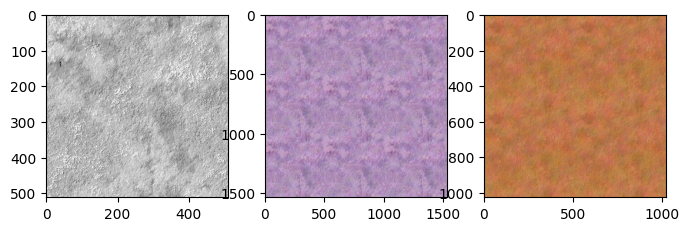

In [ ]:
image1 = mpimg.imread("075ae7e7c34c28333e0700b62c5fa70b7c2365f3.jpg")
image1 = image1[:,:,:3]
image1 = image1.astype(float) / 255.0

res1 = generate_texture(image1, 3, 3, 0.5, 0.5)
res2 = generate_texture(image1, 2, 2, -1.5, 1.5)

fig, axs = plt.subplots(1, 3, figsize=(8, 8))
axs[0].imshow(image1)
axs[1].imshow(res1)
axs[2].imshow(res2)
plt.show()